## Importing libraries

In [74]:
import logging
import pandas as pd
import numpy as np
from numpy import random 
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats
import seaborn as sns

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [76]:
#load the three data sets.

Fertilizers_data = pd.read_csv('/content/drive/MyDrive/data/Fertilizers_FAOSTAT_data_en_12-3-2022.csv')
Emissions_data = pd.read_csv('/content/drive/MyDrive/data/Emissions_FAOSTAT_data_en_12-3-2022-1.csv')
Yield_df = pd.read_csv('/content/drive/MyDrive/data/FAOSTAT_data_en_12-3-2022.csv')


In [77]:
#time series data from 1901-2020
Precipitation_annual = pd.read_csv('/content/drive/MyDrive/data/pr_timeseries_annual_cru_1901-2021_IND.csv', skiprows=1, index_col=0)
Maxtemp_annual = pd.read_csv('/content/drive/MyDrive/data/tasmax_timeseries_annual_cru_1901-2021_IND.csv', skiprows=1, index_col=0)
Avgtemp_annual = pd.read_csv('/content/drive/MyDrive/data/tas_timeseries_annual_cru_1901-2021_IND.csv', skiprows=1, index_col=0)
Mintemp_annual = pd.read_csv('/content/drive/MyDrive/data/tasmin_timeseries_annual_cru_1901-2021_IND.csv', skiprows=1, index_col=0)

## EDA -Performing the Data Analysis

#### Fertilizers, Emissions, Yield and Climate

In [78]:
Fertilizers_data.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,EF,Fertilizers indicators,356,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1961,1961,kg/ha,1.55,E,Estimated value
1,EF,Fertilizers indicators,356,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1962,1962,kg/ha,2.05,E,Estimated value
2,EF,Fertilizers indicators,356,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1963,1963,kg/ha,2.33,E,Estimated value
3,EF,Fertilizers indicators,356,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1964,1964,kg/ha,3.42,E,Estimated value
4,EF,Fertilizers indicators,356,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1965,1965,kg/ha,3.54,E,Estimated value


In [79]:
Emissions_data.head() #displaying the emissions data

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions Totals,356,India,7234,Direct emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,27.8120,E,Estimated value,NaN
1,GT,Emissions Totals,356,India,7236,Indirect emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,6.2577,E,Estimated value,NaN
2,GT,Emissions Totals,356,India,7230,Emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,34.0697,E,Estimated value,NaN
3,GT,Emissions Totals,356,India,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,9028.4589,E,Estimated value,NaN
4,GT,Emissions Totals,356,India,723113,Emissions (CO2eq) (AR5),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,9028.4589,E,Estimated value,NaN


In [81]:
Yield_df.head() #displaying the yield_data

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1510,Potatoes,1961,1961,ha,375000,A,Official figure
1,QCL,Crops and livestock products,356,India,5312,Area harvested,1510,Potatoes,1962,1962,ha,365000,A,Official figure
2,QCL,Crops and livestock products,356,India,5312,Area harvested,1510,Potatoes,1963,1963,ha,413000,A,Official figure
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1510,Potatoes,1964,1964,ha,415000,A,Official figure
4,QCL,Crops and livestock products,356,India,5312,Area harvested,1510,Potatoes,1965,1965,ha,429000,A,Official figure


In [82]:
index = Precipitation_annual.iloc[-61:-1].index
Climatology = pd.DataFrame(index=index, columns=['precipitation', 'min_temp', 'avg_temp', 'max_temp'])

Climatology['precipitation'] = Precipitation_annual.iloc[-61:-1].apply(lambda x: x.mean(), axis=1)
Climatology['min_temp'] = Maxtemp_annual.iloc[-61:-1].apply(lambda x: x.mean(), axis=1)
Climatology['avg_temp'] = Avgtemp_annual.iloc[-61:-1].apply(lambda x: x.mean(), axis=1)
Climatology['max_temp'] = Mintemp_annual.iloc[-61:-1].apply(lambda x: x.mean(), axis=1)

In [84]:
Climatology.head()

,precipitation,min_temp,avg_temp,max_temp
1961,1514.370222,25.582667,20.074444,14.609556
1962,1377.182000,25.713556,20.093111,14.516667
1963,1330.484000,25.905111,20.230000,14.597111
1964,1498.646000,25.729111,20.091556,14.496889
1965,1230.998667,25.769333,20.083556,14.439556


### Data Cleaning

In [85]:
# Checking for Null values
# From this we can see that the Dataset has no Null values
Fertilizers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       180 non-null    object 
 1   Domain            180 non-null    object 
 2   Area Code (M49)   180 non-null    int64  
 3   Area              180 non-null    object 
 4   Element Code      180 non-null    int64  
 5   Element           180 non-null    object 
 6   Item Code         180 non-null    int64  
 7   Item              180 non-null    object 
 8   Year Code         180 non-null    int64  
 9   Year              180 non-null    int64  
 10  Unit              180 non-null    object 
 11  Value             180 non-null    float64
 12  Flag              180 non-null    object 
 13  Flag Description  180 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 19.8+ KB


In [86]:
# Finding the number if unique values in each column
# The main feature wrt Fertilizers dataset are: year, Item and Value
Fertilizers_data.nunique()

Domain Code           1
Domain                1
Area Code (M49)       1
Area                  1
Element Code          1
Element               1
Item Code             3
Item                  3
Year Code            60
Year                 60
Unit                  1
Value               177
Flag                  1
Flag Description      1
dtype: int64

In [88]:
# Lets have a look at the 3 Items
Fertilizers_data['Item'].value_counts()

Nutrient nitrogen N (total)        60
Nutrient phosphate P2O5 (total)    60
Nutrient potash K2O (total)        60
Name: Item, dtype: int64

In [89]:
Fertilizers_data.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description'],
      dtype='object')

In [90]:
# Getting rid of unwanted columns in Fertilizers dataframe


Fertilizers_data.drop(columns=['Domain Code', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Year Code', 'Unit',
       'Flag', 'Flag Description'], inplace=True)

Nitrogen = Fertilizers_data['Item'] == 'Nutrient nitrogen N (total)'
Phosphate = Fertilizers_data['Item'] == 'Nutrient phosphate P2O5 (total)'
Potash = Fertilizers_data['Item'] == 'Nutrient potash K2O (total)'
df_nitrogen = Fertilizers_data[Nitrogen].set_index('Year')
df_phosphate = Fertilizers_data[Phosphate].set_index('Year')
df_potash = Fertilizers_data[Potash].set_index('Year')


In [91]:
Fertilizers_data.head(5)

,Domain,Item,Year,Value
0,Fertilizers indicators,Nutrient nitrogen N (total),1961,1.55
1,Fertilizers indicators,Nutrient nitrogen N (total),1962,2.05
2,Fertilizers indicators,Nutrient nitrogen N (total),1963,2.33
3,Fertilizers indicators,Nutrient nitrogen N (total),1964,3.42
4,Fertilizers indicators,Nutrient nitrogen N (total),1965,3.54


In [92]:
df_nitrogen.head()

,Domain,Item,Value
Year,,,
1961,Fertilizers indicators,Nutrient nitrogen N (total),1.55
1962,Fertilizers indicators,Nutrient nitrogen N (total),2.05
1963,Fertilizers indicators,Nutrient nitrogen N (total),2.33
1964,Fertilizers indicators,Nutrient nitrogen N (total),3.42
1965,Fertilizers indicators,Nutrient nitrogen N (total),3.54


In [93]:
# Checking for Null values
# From this we can see that the Dataset has no Null values
Emissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5415 entries, 0 to 5414
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5415 non-null   object 
 1   Domain            5415 non-null   object 
 2   Area Code (M49)   5415 non-null   int64  
 3   Area              5415 non-null   object 
 4   Element Code      5415 non-null   int64  
 5   Element           5415 non-null   object 
 6   Item Code         5415 non-null   int64  
 7   Item              5415 non-null   object 
 8   Year Code         5415 non-null   int64  
 9   Year              5415 non-null   int64  
 10  Source Code       5415 non-null   int64  
 11  Source            5415 non-null   object 
 12  Unit              5415 non-null   object 
 13  Value             5415 non-null   float64
 14  Flag              5415 non-null   object 
 15  Flag Description  5415 non-null   object 
 16  Note              0 non-null      float64


In [94]:
#Checking the number of unique columns in the emissions data set
Emissions_data.nunique()

Domain Code            1
Domain                 1
Area Code (M49)        1
Area                   1
Element Code           9
Element                9
Item Code             30
Item                  30
Year Code             60
Year                  60
Source Code            1
Source                 1
Unit                   1
Value               4358
Flag                   1
Flag Description       1
Note                   0
dtype: int64

In [95]:
# Lets have a look at the Elements and Items
print(Emissions_data['Element'].value_counts())
print('**************************************')
print(Emissions_data['Item'].value_counts())

Emissions (CO2eq) (AR5)                 1162
Emissions (N2O)                          887
Emissions (CO2eq) from N2O (AR5)         887
Emissions (CH4)                          736
Emissions (CO2eq) from CH4 (AR5)         736
Emissions (CO2)                          496
Direct emissions (N2O)                   240
Indirect emissions (N2O)                 240
Emissions (CO2eq) from F-gases (AR5)      31
Name: Element, dtype: int64
**************************************
Crop Residues                      300
Burning - Crop residues            300
Manure Management                  300
Manure left on Pasture             300
Manure applied to Soils            300
Synthetic Fertilizers              300
IPPU                               217
Food systems waste disposal        186
Energy                             186
Food Transport                     186
Food Household Consumption         186
Food Retail                        186
Food Packaging                     186
Food Processing      

In [96]:
# Retaining rows containing Element: Emission(Co2), Emission(CH4) and Emission(N2O)

values=['Direct emissions (N2O)', 'Emissions (CO2)', 'Emissions (N2O)', 'Emissions (CH4)']
item_values = ['Crop Residues', 'Burning - Crop residues', 'Fertilizers Manufacturing']
Emissions = Emissions_data.loc[Emissions_data['Element'].isin(values)]
Emissions = Emissions_data.loc[Emissions_data['Item'].isin(item_values)]

In [98]:
Emissions['Element'].value_counts()   #checking the value counts for different caategories in the Element

Emissions (N2O)                     151
Emissions (CO2eq) from N2O (AR5)    151
Emissions (CO2eq) (AR5)             151
Direct emissions (N2O)               60
Indirect emissions (N2O)             60
Emissions (CH4)                      60
Emissions (CO2eq) from CH4 (AR5)     60
Emissions (CO2)                      31
Name: Element, dtype: int64

In [99]:
Emissions.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Source Code',
       'Source', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [100]:
# Getting rid of unwanted columns in Fertilizers dataframe


Emissions.drop(columns=['Domain Code', 'Area Code (M49)', 'Area', 'Element Code', 'Item Code', 'Year Code', 'Source Code',
       'Source', 'Unit', 'Flag', 'Flag Description', 'Note'], inplace=True)


Emissions = Emissions.set_index('Year')


<ipython-input-100-9de09ca408b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emissions.drop(columns=['Domain Code', 'Area Code (M49)', 'Area', 'Element Code', 'Item Code', 'Year Code', 'Source Code',


In [101]:
Emissions.head()

,Domain,Element,Item,Value
Year,,,,
1961,Emissions Totals,Direct emissions (N2O),Crop Residues,27.8120
1961,Emissions Totals,Indirect emissions (N2O),Crop Residues,6.2577
1961,Emissions Totals,Emissions (N2O),Crop Residues,34.0697
1961,Emissions Totals,Emissions (CO2eq) from N2O (AR5),Crop Residues,9028.4589
1961,Emissions Totals,Emissions (CO2eq) (AR5),Crop Residues,9028.4589


In [103]:
#check the yield data set for null values 
#we can observe that there are no null values
Yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       180 non-null    object
 1   Domain            180 non-null    object
 2   Area Code (M49)   180 non-null    int64 
 3   Area              180 non-null    object
 4   Element Code      180 non-null    int64 
 5   Element           180 non-null    object
 6   Item Code (CPC)   180 non-null    int64 
 7   Item              180 non-null    object
 8   Year Code         180 non-null    int64 
 9   Year              180 non-null    int64 
 10  Unit              180 non-null    object
 11  Value             180 non-null    int64 
 12  Flag              180 non-null    object
 13  Flag Description  180 non-null    object
dtypes: int64(6), object(8)
memory usage: 19.8+ KB


In [105]:

Yield_df.nunique()


Domain Code           1
Domain                1
Area Code (M49)       1
Area                  1
Element Code          3
Element               3
Item Code (CPC)       1
Item                  1
Year Code            60
Year                 60
Unit                  3
Value               180
Flag                  2
Flag Description      2
dtype: int64

In [106]:
#value_counts and we are taking the Element='Production' data only
Yield_df['Element'].value_counts()

Area harvested    60
Yield             60
Production        60
Name: Element, dtype: int64

In [37]:
Yield_df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [107]:
#Dropping the unwanted columns from the yield data


Yield_df.drop(columns=['Domain Code', 'Area Code (M49)', 'Area', 'Element Code', 'Item Code (CPC)', 'Item', 'Year Code', 'Unit',
 'Flag', 'Flag Description'], inplace=True)

Yield = Yield_df.set_index('Year')

In [108]:
Yield.head() #displays the yield data

,Domain,Element,Value
Year,,,
1961,Crops and livestock products,Area harvested,375000
1962,Crops and livestock products,Area harvested,365000
1963,Crops and livestock products,Area harvested,413000
1964,Crops and livestock products,Area harvested,415000
1965,Crops and livestock products,Area harvested,429000


### Visualisation of the usage of Fertilizers over the years

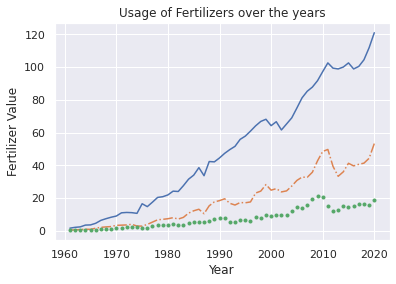

In [109]:
import matplotlib.pyplot as plt

plt.plot(df_nitrogen.index, df_nitrogen['Value'])
plt.plot(df_phosphate.index, df_phosphate['Value'], '-.')
plt.plot(df_potash.index, df_potash['Value'], '.')

plt.xlabel("Year")
plt.ylabel("Fertilizer Value")
plt.title('Usage of Fertilizers over the years')
plt.show()



## Performing Scaling and Correlation

#### Performing Analysis of Fertilizer's vs Potato Production

In [110]:
production_mask = Yield_df['Element'] == 'Production'
df_production = Yield_df[production_mask].set_index('Year')
df_production.head()

,Domain,Element,Value
Year,,,
1961,Crops and livestock products,Production,2719000
1962,Crops and livestock products,Production,2447000
1963,Crops and livestock products,Production,3365000
1964,Crops and livestock products,Production,2593000
1965,Crops and livestock products,Production,3605000


In [112]:
df_prod_fertilizer = pd.DataFrame(index=df_production.index, columns=['production', 'nitrogen', 'phosphate', 'potash'])
mm_scaler = MinMaxScaler()
df_prod_fertilizer['production']=mm_scaler.fit_transform(df_production['Value'].values.reshape(-1, 1))
df_prod_fertilizer['nitrogen']=mm_scaler.fit_transform(df_nitrogen['Value'].values.reshape(-1, 1))
df_prod_fertilizer['phosphate']=mm_scaler.fit_transform(df_phosphate['Value'].values.reshape(-1, 1))
df_prod_fertilizer['potash']=mm_scaler.fit_transform(df_potash['Value'].values.reshape(-1, 1))

In [113]:
df_prod_fertilizer.head()

,production,nitrogen,phosphate,potash
Year,,,,
1961,0.005567,0.000000,0.000000,0.000000
1962,0.000000,0.004187,0.002460,0.002351
1963,0.018787,0.006532,0.006433,0.006582
1964,0.002988,0.015659,0.010218,0.012224
1965,0.023699,0.016664,0.008325,0.014575


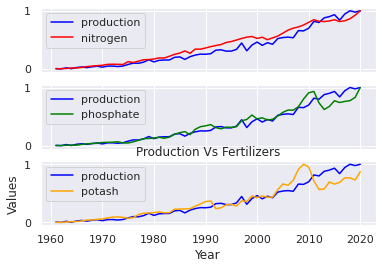

In [114]:
x=df_prod_fertilizer.index
fig, ax = plt.subplots(nrows=3, sharex=True)


ax[0].plot(x, df_prod_fertilizer['production'], color='blue', label='production')
ax[0].plot(x, df_prod_fertilizer['nitrogen'], color='red', label='nitrogen')
ax[0].legend()

ax[1].plot(x, df_prod_fertilizer['production'], color='blue', label='production')
ax[1].plot(x, df_prod_fertilizer['phosphate'], color='green', label='phosphate')
ax[1].legend()

ax[2].plot(x, df_prod_fertilizer['production'], color='blue', label='production')
ax[2].plot(x, df_prod_fertilizer['potash'], color='orange', label='potash')
ax[2].legend()

plt.xlabel("Year")
plt.ylabel("Values")
plt.title('Production Vs Fertilizers')
plt.show()

In [115]:
# Clearly potato production is more when Nitrogen fertilizer is used
df_prod_fertilizer.corr()

,production,nitrogen,phosphate,potash
production,1.000000,0.973624,0.961905,0.922592
nitrogen,0.973624,1.000000,0.983929,0.949675
phosphate,0.961905,0.983929,1.000000,0.969988
potash,0.922592,0.949675,0.969988,1.000000


#### Analysis of Production vs Emissions

In [44]:
co2 = Emissions['Element'] == 'Emissions (CO2)'
emissions_co2 = Emissions[co2].set_index('Year')
emissions_co2 = emissions_co2.groupby('Year')[['Value']].mean()

ch4 = Emissions['Element'] == 'Emissions (CH4)'
emissions_ch4 = Emissions[ch4].set_index('Year')
emissions_ch4 = emissions_ch4.groupby('Year')[['Value']].mean()

n20 = Emissions['Element'] == 'Emissions (N2O)'
emissions_n20 = Emissions[n20].set_index('Year')
emissions_n20 = emissions_n20.groupby('Year')[['Value']].mean()

In [45]:
emissions_co2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1990 to 2020
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


In [46]:
df_prod_emission = pd.DataFrame(index=df_production.tail(31).index, columns=['production', 'co2', 'ch4', 'n20'])
mm_scaler = MinMaxScaler()
df_prod_emission['production']=mm_scaler.fit_transform(df_production['Value'].tail(31).values.reshape(-1, 1))
df_prod_emission['co2']=mm_scaler.fit_transform(emissions_co2['Value'].values.reshape(-1, 1))
df_prod_emission['ch4']=mm_scaler.fit_transform(emissions_ch4['Value'].tail(31).values.reshape(-1, 1))
df_prod_emission['n20']=mm_scaler.fit_transform(emissions_n20['Value'].tail(31).values.reshape(-1, 1))

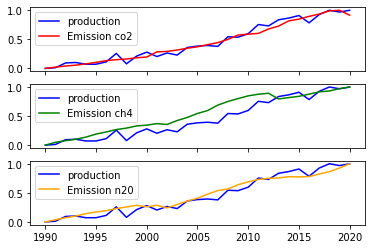

In [47]:
x=df_prod_emission.index
fig, ax = plt.subplots(nrows=3, sharex=True)

ax[0].plot(x, df_prod_emission['production'], color='blue', label='production')
ax[0].plot(x, df_prod_emission['co2'], color='red', label='Emission co2')
ax[0].legend()

ax[1].plot(x, df_prod_emission['production'], color='blue', label='production')
ax[1].plot(x, df_prod_emission['ch4'], color='green', label='Emission ch4')
ax[1].legend()

ax[2].plot(x, df_prod_emission['production'], color='blue', label='production')
ax[2].plot(x, df_prod_emission['n20'], color='orange', label='Emission n20')
ax[2].legend()

plt.show()

In [48]:
# CO2 Emissions are not effecting the potato production much when compared to other Emissions
# We observe that the production is more effected by CH4 Emissions
df_prod_emission.corr()

,production,co2,ch4,n20
production,1.000000,0.982883,0.951048,0.977668
co2,0.982883,1.000000,0.957997,0.979017
ch4,0.951048,0.957997,1.000000,0.986259
n20,0.977668,0.979017,0.986259,1.000000


#### Analysis of Production vs Climate factors

In [49]:
df_prod_climate = pd.DataFrame(index=Climatology.index, columns=['production', 'precipitation', 'min_temp', 'avg_temp', 'max_temp'])
mm_scaler = MinMaxScaler()
df_prod_climate['production']=mm_scaler.fit_transform(df_production['Value'].values.reshape(-1, 1))
df_prod_climate['precipitation']=mm_scaler.fit_transform(Climatology['precipitation'].values.reshape(-1, 1))
df_prod_climate['min_temp']=mm_scaler.fit_transform(Climatology['min_temp'].values.reshape(-1, 1))
df_prod_climate['avg_temp']=mm_scaler.fit_transform(Climatology['avg_temp'].values.reshape(-1, 1))
df_prod_climate['max_temp']=mm_scaler.fit_transform(Climatology['max_temp'].values.reshape(-1, 1))

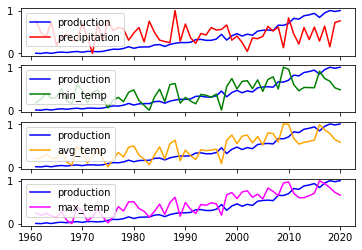

In [50]:
x=df_prod_climate.index
fig, ax = plt.subplots(nrows=4, sharex=True)

ax[0].plot(x, df_prod_climate['production'], color='blue', label='production')
ax[0].plot(x, df_prod_climate['precipitation'], color='red', label='precipitation')
ax[0].legend()

ax[1].plot(x, df_prod_climate['production'], color='blue', label='production')
ax[1].plot(x, df_prod_climate['min_temp'], color='green', label='min_temp')
ax[1].legend()

ax[2].plot(x, df_prod_climate['production'], color='blue', label='production')
ax[2].plot(x, df_prod_climate['avg_temp'], color='orange', label='avg_temp')
ax[2].legend()

ax[3].plot(x, df_prod_climate['production'], color='blue', label='production')
ax[3].plot(x, df_prod_climate['max_temp'], color='magenta', label='max_temp')
ax[3].legend()

plt.show()

In [51]:
df_prod_climate.shape

(60, 5)

## Analysis of final merged data

In [52]:
Final = pd.concat([df_prod_climate, df_prod_emission,df_prod_fertilizer],join="inner", axis=1)
Final = Final.loc[:,~Final.columns.duplicated()].copy()
Final.head()

,production,precipitation,min_temp,avg_temp,max_temp,co2,ch4,n20,nitrogen,phosphate,potash
1990,0.252211,0.685714,0.297782,0.391428,0.491696,0.000000,0.000000,0.000000,0.359404,0.340397,0.359191
1991,0.261110,0.366338,0.211263,0.259529,0.335520,0.021800,0.048952,0.036827,0.382934,0.362157,0.367654
1992,0.322289,0.235884,0.148970,0.171438,0.236148,0.041301,0.077292,0.071156,0.402110,0.309366,0.236483
1993,0.328101,0.464772,0.368098,0.400759,0.446615,0.055975,0.101687,0.099859,0.418690,0.289499,0.250588
1994,0.305863,0.430600,0.346704,0.378301,0.426239,0.077687,0.138246,0.142043,0.454446,0.318448,0.302304


### Visualisation of all the required features over years

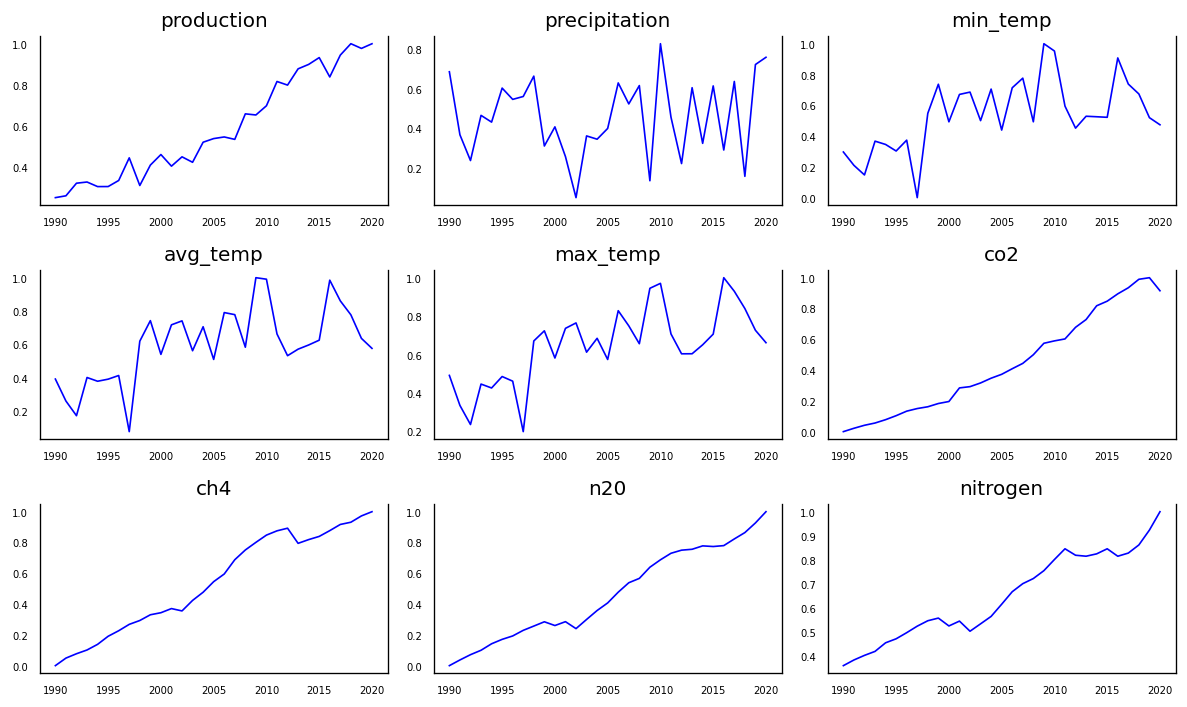

In [53]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
 data = Final[Final.columns[i]]
 ax.plot(data, color='blue', linewidth=1)
 ax.set_title(Final.columns[i])
 ax.xaxis.set_ticks_position('none')
 ax.yaxis.set_ticks_position('none')
 ax.spines["top"].set_alpha(0)
 ax.tick_params(labelsize=6)
plt.tight_layout();

### Performing the normality Test
To extract maximum information from our data, it is important to have a ***normal or Gaussian distribution*** of the data. 
To check for that, we have done a normality test based on the Null and Alternate Hypothesis intuition.

In [116]:
from scipy import stats

production=Final.production.values
print(production)

stat,p = stats.normaltest(production)

print("Production Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis)')

[0.25221128 0.26110963 0.32228885 0.32810102 0.30586333 0.30604547
 0.33555656 0.44550887 0.31118229 0.41028385 0.46155782 0.40512658
 0.45042466 0.42392813 0.5214334  0.53907251 0.54699057 0.53522297
 0.65921045 0.65374414 0.69848965 0.81641324 0.79888668 0.87789534
 0.89941264 0.93244377 0.83846673 0.94464114 1.         0.97707877
 0.99979535]
Production Statistics = 10.378, p=0.006
Data looks non-Gaussian (reject null hypothesis)


In [117]:
from scipy import stats

df_fertilizers_nitrogen=Final.nitrogen.values
print(df_fertilizers_nitrogen)


stat,p = stats.normaltest(df_fertilizers_nitrogen)

print("df_fertilizers_nitrogen Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis)')

[0.35940378 0.38293418 0.4021102  0.41869034 0.45444649 0.47111037
 0.49656674 0.52369787 0.54622341 0.55727684 0.52453525 0.54471613
 0.50259588 0.53332775 0.56431084 0.61497237 0.66697371 0.70055267
 0.72182214 0.75464746 0.80103835 0.84567074 0.81879082 0.8147714
 0.82456875 0.84567074 0.81468766 0.82783453 0.86166471 0.92354714
 1.        ]
df_fertilizers_nitrogen Statistics = 6.749, p=0.034
Data looks non-Gaussian (reject null hypothesis)


### Checking the Normal Distribution of data using Bell Curve

Production: Kurtosis of normal distribution: -1.3452962633045142
Production:Skewness of normal distribution: 0.330609737338373


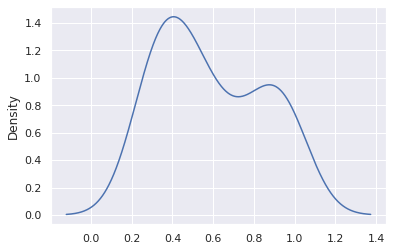

In [118]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis

Final.production.plot(kind = 'density')  

print('Production: Kurtosis of normal distribution: {}'.format(stats.kurtosis(Final.production)))
print('Production:Skewness of normal distribution: {}'.format(stats.skew(Final.production)))

These two distributions give us some intuition about the distribution of our data. The kurtosis of this dataset is -1.34. Since this value is less than 0, it is considered to be a light-tailed dataset. It has as much data in each tail as it does in the peak. Moderate skewness refers to the value between -1 and -0.5 or 0.5 and 1.

### For better Analysis, Plotting the Probability Plot

count    31.000000
mean      0.588980
std       0.252598
min       0.252211
25%       0.370342
50%       0.535223
75%       0.827440
max       1.000000
Name: production, dtype: float64

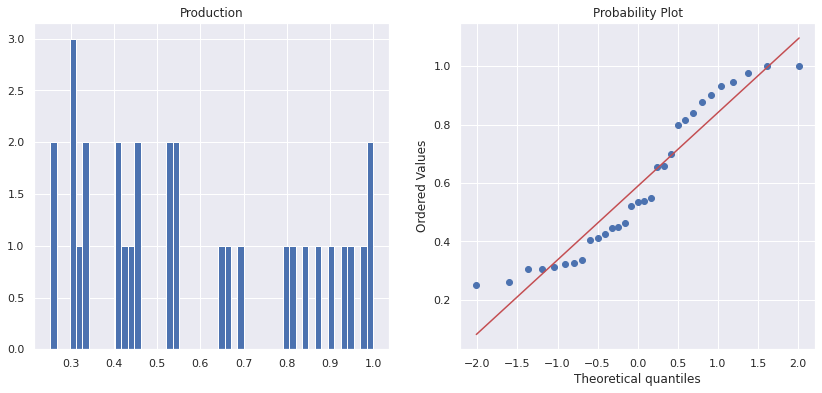

In [119]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
Final['production'].hist(bins=50)
plt.title('Production')
plt.subplot(1,2,2)
stats.probplot(Final['production'], plot=plt);
Final.production.describe().T

Normal probability plot also shows the data is far from normally distributed.

### Correlation Matrix -using Heat Map

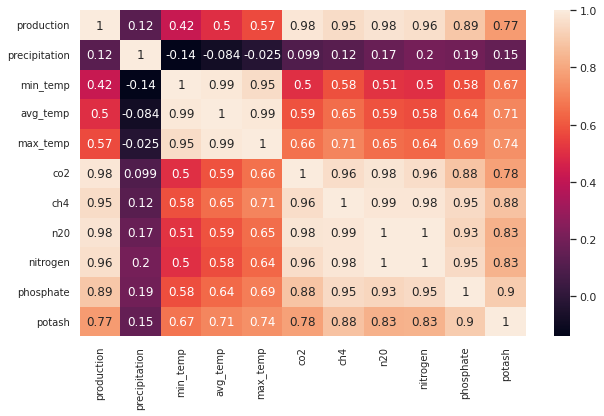

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
correlation = Final.corr()

fig, ax = plt.subplots()
sns.heatmap(correlation,xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Train and Test  time series Data using VAR Model: ###
The VAR model will be fitted on X_train and then used to forecast the next 15 observations. These forecasts will be compared against the actual present in test data.

In [59]:
n_OBSERV_MAXLAGS=3
n_obs=n_OBSERV_MAXLAGS
X_train, X_test = Final[0:-n_obs], Final[-n_obs:]
print(X_train.shape, X_test.shape)

(28, 11) (3, 11)


### Data Transformation: ###

Applying first differencing on training set to make all the series stationary. However, this is an iterative process where we after first differencing, the series may still be non-stationary. We shall have to apply second difference or log transformation to standardize the series in such cases.

In [60]:
transform_data = X_train.diff().dropna()
transform_data.head()

,production,precipitation,min_temp,avg_temp,max_temp,co2,ch4,n20,nitrogen,phosphate,potash
1991,0.008898,-0.319375,-0.086519,-0.131899,-0.156176,0.021800,0.048952,0.036827,0.023530,0.021760,0.008463
1992,0.061179,-0.130454,-0.062294,-0.088091,-0.099372,0.019501,0.028340,0.034328,0.019176,-0.052791,-0.131171
1993,0.005812,0.228888,0.219129,0.229322,0.210468,0.014674,0.024396,0.028703,0.016580,-0.019868,0.014104
1994,-0.022238,-0.034172,-0.021394,-0.022458,-0.020377,0.021712,0.036559,0.042184,0.035756,0.028950,0.051716
1995,0.000182,0.172343,-0.042473,0.012494,0.059595,0.025947,0.052502,0.028655,0.016664,-0.003027,0.009403


In [61]:
transform_data.describe()

,production,precipitation,min_temp,avg_temp,max_temp,co2,ch4,n20,nitrogen,phosphate,potash
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.025646,-0.001818,0.016313,0.017385,0.016205,0.034616,0.033969,0.030484,0.017349,0.015565,0.015045
std,0.063707,0.279962,0.241719,0.216991,0.174851,0.023515,0.033755,0.026698,0.025025,0.070181,0.091179
min,-0.134327,-0.482254,-0.372660,-0.337024,-0.263224,0.008271,-0.098335,-0.045173,-0.042120,-0.196026,-0.241655
25%,-0.008617,-0.221323,-0.156048,-0.131188,-0.101326,0.018223,0.024709,0.022079,0.012100,-0.011447,-0.025623
50%,0.021517,-0.016668,-0.003618,0.012494,0.000279,0.025947,0.037253,0.028703,0.021269,0.021760,0.009873
75%,0.070094,0.200615,0.183105,0.133718,0.065876,0.043554,0.049578,0.045836,0.031904,0.057332,0.086977
max,0.123987,0.694379,0.546641,0.543097,0.471738,0.089334,0.092711,0.072561,0.052001,0.132072,0.187118


### Checking if the data is stationary to fit for VAR Model ###


In [62]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import statsmodels.tsa.stattools as sm
def augmented_dickey_fuller_statistics(time_series):
    result = sm.adfuller(time_series.values, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [64]:
print('Augmented Dickey-Fuller Test: production')
augmented_dickey_fuller_statistics(transform_data['production'])
print('Augmented Dickey-Fuller Test: precipitation')
augmented_dickey_fuller_statistics(transform_data['precipitation'])
print('Augmented Dickey-Fuller Test: Min Temp')
augmented_dickey_fuller_statistics(transform_data['min_temp'])
print('Augmented Dickey-Fuller Test: Avg Temp')
augmented_dickey_fuller_statistics(transform_data['avg_temp'])
print('Augmented Dickey-Fuller Test: Max Temp')
augmented_dickey_fuller_statistics(transform_data['max_temp'])
print('Augmented Dickey-Fuller Test: Emission CO2')
augmented_dickey_fuller_statistics(transform_data['co2'])
print('Augmented Dickey-Fuller Test: Emission N2O')
augmented_dickey_fuller_statistics(transform_data['n20'])
print('Augmented Dickey-Fuller Test: Emission CO2')
augmented_dickey_fuller_statistics(transform_data['co2'])
print('Augmented Dickey-Fuller Test: nitrogen')
augmented_dickey_fuller_statistics(transform_data['nitrogen'])
print('Augmented Dickey-Fuller Test: phosphate')
augmented_dickey_fuller_statistics(transform_data['phosphate'])
print('Augmented Dickey-Fuller Test: potash')
augmented_dickey_fuller_statistics(transform_data['potash'])

Augmented Dickey-Fuller Test: production
ADF Statistic: -8.547699
p-value: 0.000000
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
Augmented Dickey-Fuller Test: precipitation
ADF Statistic: -3.717922
p-value: 0.003868
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646
Augmented Dickey-Fuller Test: Min Temp
ADF Statistic: -6.312005
p-value: 0.000000
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
Augmented Dickey-Fuller Test: Avg Temp
ADF Statistic: -6.155254
p-value: 0.000000
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
Augmented Dickey-Fuller Test: Max Temp
ADF Statistic: -6.509984
p-value: 0.000000
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
Augmented Dickey-Fuller Test: Emission CO2
ADF Statistic: 0.318606
p-value: 0.978182
Critical Values:
	1%: -3.859
	5%: -3.042
	10%: -2.661
Augmented Dickey-Fuller Test: Emission N2O
ADF Statistic: -2.149230
p-value: 0.225185
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
Augmented Dickey-Fuller Test: Emis

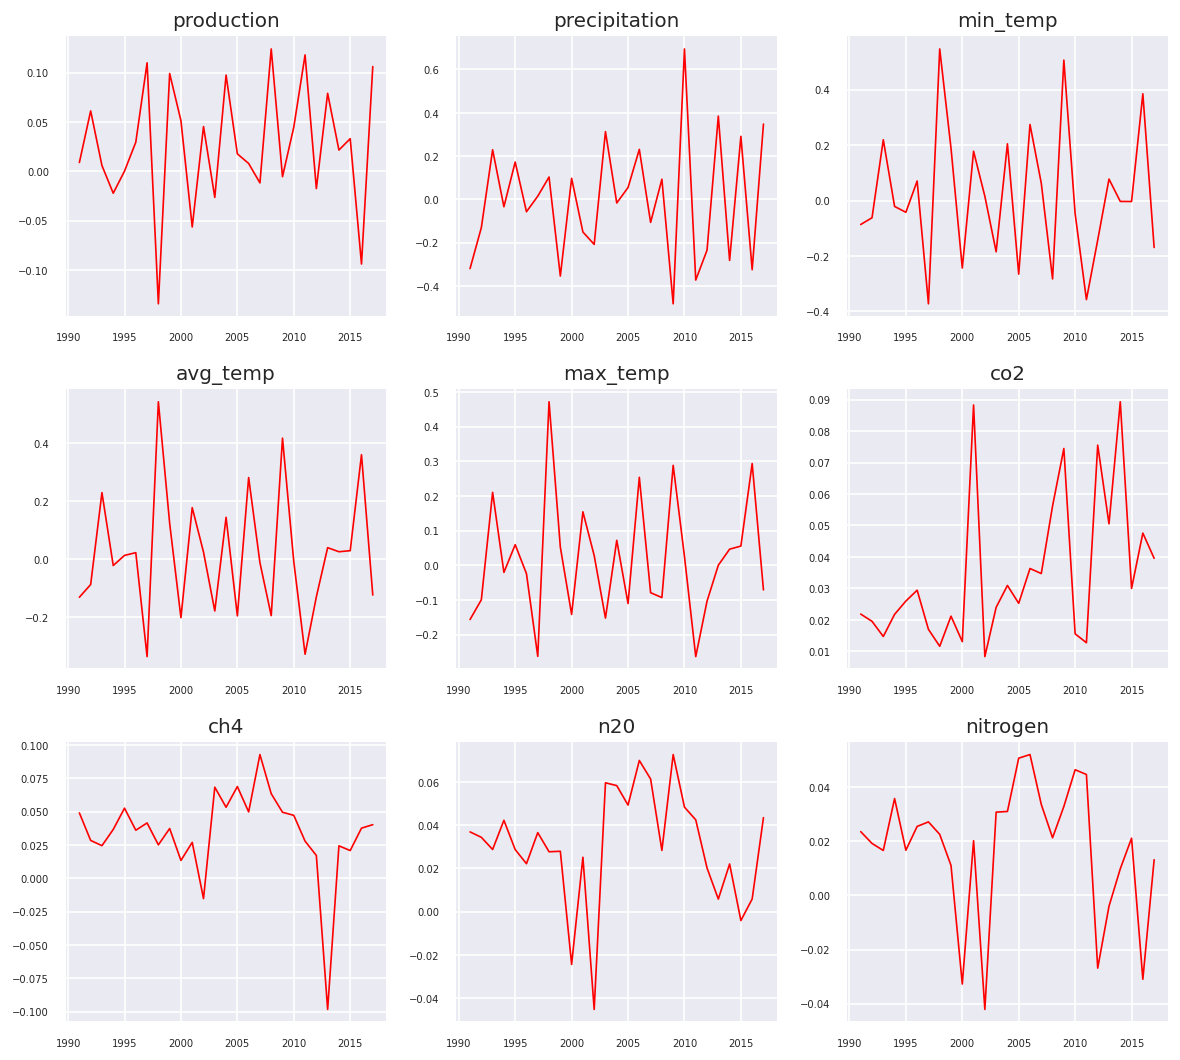

In [65]:
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,9))
for i, ax in enumerate(axes.flatten()):
    d = transform_data[transform_data.columns[i]]
    ax.plot(d, color='red', linewidth=1)
    # Decorations
    ax.set_title(Final.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Granger’s Causality Test: ###


The formal definition of Granger causality can be explained as, whether past values of x aid in the prediction of yt, conditional on having already accounted for the effects on yt of past values of y (and perhaps of past values of other variables). If they do, the x is said to “Granger cause” y. So, the basis behind VAR is that each of the time series in the system influences each other.
Granger’s causality Tests the null hypothesis that the coefficients of past values in the regression equation is zero. So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis. This has been performed on original data-set.

In [66]:
import statsmodels.tsa.stattools as sm
maxlag=n_OBSERV_MAXLAGS
test = 'ssr-chi2test'
def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = sm.grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset



In [ ]:
grangers_causality_matrix(Final, variables = Final.columns)

,production_x,precipitation_x,min_temp_x,avg_temp_x,max_temp_x,co2_x,ch4_x,n20_x,nitrogen_x,phosphate_x,potash_x
production_y,1.0000,0.7381,0.0011,0.0013,0.0022,0.0000,0.0004,0.0000,0.0012,0.0038,0.0011
precipitation_y,0.1768,1.0000,0.7810,0.8646,0.8783,0.2326,0.2599,0.0243,0.0095,0.3955,0.3117
min_temp_y,0.1347,0.2519,1.0000,0.0019,0.0016,0.1381,0.0381,0.1005,0.0808,0.0642,0.0020
avg_temp_y,0.0720,0.3743,0.0047,1.0000,0.0035,0.0793,0.0210,0.0587,0.0473,0.0512,0.0013
max_temp_y,0.0354,0.5599,0.0191,0.0174,1.0000,0.0423,0.0116,0.0325,0.0268,0.0444,0.0016
co2_y,0.0196,0.7405,0.1770,0.2559,0.3916,1.0000,0.0057,0.0017,0.0014,0.0214,0.4364
ch4_y,0.4954,0.0008,0.0500,0.0409,0.0394,0.0097,1.0000,0.3483,0.0577,0.0000,0.0014
n20_y,0.5554,0.0611,0.6128,0.5975,0.4175,0.0010,0.1558,1.0000,0.0114,0.3949,0.0590
nitrogen_y,0.1305,0.0286,0.8878,0.8032,0.5198,0.0019,0.0891,0.0000,1.0000,0.7190,0.0489
phosphate_y,0.0071,0.1638,0.3521,0.2812,0.1421,0.0021,0.0000,0.0001,0.0007,1.0000,0.0001


The row are the response (y) and the columns are the predictor series (x).
* If we take the value 0.0000 in (row 1, column 6), it refers to the p-value of the Granger’s Causality test for CO2_x causing production_y. The 0.0196 in (row 6, column 1) refers to the p-value of CO2_y causing production_x and so on.

So, looking at the p-Values, we can assume that, all the variables (time series) in the system are interchangeably causing each other. This justifies the VAR modeling approach for this system of multi time-series to forecast.

### Applying the VAR Model ###
VAR (Vector Autoregression) models require that the time series data be stationary. Stationarity means that the statistical properties of the series, such as mean and variance, remain constant over time. A stationary time series has no trends or seasonality. The Augmented Dickey-Fuller (ADF) test is commonly used to test for stationarity.

So, I will fit the VAR model on training set and then used the fitted model to forecast the next year observation. These forecasts will be compared against the actual present in test data. I have taken the maximum lag (1) to identify the required lags for VAR model.

In [67]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

mod = VAR(transform_data)
res = mod.fit(maxlags=1, ic='aic')
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 26, Mar, 2023
Time:                     17:31:02
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -73.1314
Nobs:                     26.0000    HQIC:                  -77.6794
Log likelihood:           759.927    FPE:                6.69764e-35
AIC:                     -79.5187    Det(Omega_mle):     1.03041e-36
--------------------------------------------------------------------
Results for equation production
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.010819         0.028780           -0.376           0.707
L1.production           -0.167783         0.293507           -0.572           0.568
L1.precipitation         0.058260         0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Residual plot ###

Residual plot looks normal with constant mean throughout apart from some large fluctuation during 2006 and 2010 etc.

In [68]:
y_fitted = res.fittedvalues
y_fitted

,production,precipitation,min_temp,avg_temp,max_temp,co2,ch4,n20,nitrogen,phosphate,potash
1992,0.048856,0.197400,-0.083689,-0.038522,0.006754,0.025719,0.035935,0.023478,0.010286,-0.014418,0.005789
1993,0.018913,0.050871,-0.051741,-0.054053,-0.049635,0.040925,0.012399,0.024770,-0.000659,-0.086194,0.016837
1994,0.016552,-0.121794,0.067354,0.036134,0.004053,0.036823,0.053519,0.049480,0.030235,0.035132,0.094826
1995,0.014019,0.055082,0.202702,0.197579,0.169146,0.025328,0.043894,0.032686,0.016463,0.015844,0.041242
1996,0.020654,-0.110536,0.164271,0.122803,0.071010,0.040625,0.037215,0.047890,0.030232,0.023842,0.031598
1997,0.061179,-0.145286,-0.245245,-0.202438,-0.138563,0.031790,0.040267,0.009545,-0.004181,0.002348,0.054599
1998,-0.060557,0.086934,0.305634,0.306930,0.269460,0.035095,0.044677,0.046872,0.031730,0.018432,-0.077303
1999,0.077562,-0.092871,-0.091998,-0.107991,-0.108041,0.014447,0.069370,0.042078,0.026410,0.045659,0.042790
2000,-0.035078,0.311659,0.014579,0.042851,0.062081,0.017532,0.053382,0.028859,0.009484,0.012355,0.044958
2001,-0.002897,-0.058820,0.048078,0.043261,0.033137,0.056452,0.021721,0.037713,0.020116,0.002988,0.016139


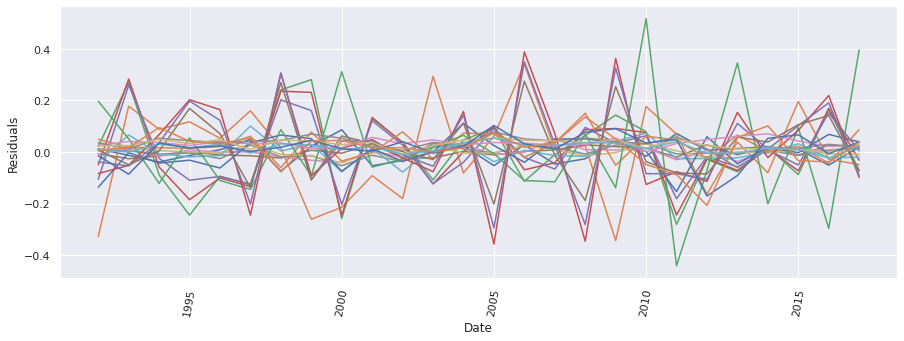

In [121]:
y_fitted = res.fittedvalues
residuals = res.resid
plt.figure(figsize = (15,5))
plt.plot(residuals, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=80)
plt.ylabel('Residuals')
plt.grid(True)

### Testing Auto Correlation in Regression Analysis -Durbin-Watson statistic ###
The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no auto-correlation detected in the sample. Values from 0 to less than 2 indicate positive auto-correlation and values from 2 to 4 indicate negative auto-correlation. A rule of thumb is that test statistic values in the range of 1.5 to 2.5 are relatively normal. Any value outside this range could be a cause for concern.

In [122]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(res.resid)
for col,val in zip(transform_data.columns, out):
    print((col), ":", round(val,2))

production : 2.56
precipitation : 2.07
min_temp : 2.2
avg_temp : 2.31
max_temp : 2.4
co2 : 1.96
ch4 : 1.83
n20 : 1.84
nitrogen : 2.09
phosphate : 2.36
potash : 1.88


#### Prediction: #### 
In order to forecast, the VAR model expects up to the lag order number of observations from the past data. This is because, the terms in the VAR model are essentially the lags of the various time series in the data-set, so we need to provide as many of the previous values as indicated by the lag order used by the model.

In [123]:
# Get the lag order
lag_order = res.k_ar
print(lag_order)
# Input data for forecasting
input_data = transform_data.values[-lag_order:]
print(input_data)
# forecasting
pred = res.forecast(y=input_data, steps=n_obs)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print(pred)

1
[[ 0.10617441  0.34739971 -0.16941954 -0.12430808 -0.07076064  0.03954546
   0.04014973  0.04340706  0.01314688  0.01854305  0.0771039 ]]
      production_pred  precipitation_pred  min_temp_pred  avg_temp_pred  \
2018         0.058315           -0.206583      -0.179332      -0.157317   
2019         0.014173           -0.126836       0.059865       0.068398   
2020        -0.004182            0.107832       0.112229       0.078753   

      max_temp_pred  co2_pred  ch4_pred  n20_pred  nitrogen_pred  \
2018      -0.118639  0.064616  0.052910  0.070430       0.075124   
2019       0.068779  0.032534  0.020507  0.007195      -0.005198   
2020       0.038616  0.034994  0.001298  0.016792      -0.009807   

      phosphate_pred  potash_pred  
2018        0.106047    -0.028407  
2019       -0.037766    -0.109889  
2020       -0.070248    -0.003535  


In [ ]:
print(X_test.index)

Int64Index([2018, 2019, 2020], dtype='int64')


#### Invert the transformation: ####

The forecasts are generated but it is on the scale of the training data used by the model. So, to bring it back up to its original scale, we need to de-difference it.
The way to convert the differencing is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number.
This process can be reversed by adding the observation at the prior time step to the difference value. inverted(ts) = differenced(ts) + observation(ts-1)

In [124]:
# inverting transformation
def invert_transformation(X_train, pred):
    forecast = pred.copy()
    columns = X_train.columns
    for col in columns:
        forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
        return forecast

output = invert_transformation(X_train, pred)


output['Date'] = output.index

print(output)

      production_pred  precipitation_pred  min_temp_pred  avg_temp_pred  \
2018         1.002956           -0.206583      -0.179332      -0.157317   
2019         1.017129           -0.126836       0.059865       0.068398   
2020         1.012947            0.107832       0.112229       0.078753   

      max_temp_pred  co2_pred  ch4_pred  n20_pred  nitrogen_pred  \
2018      -0.118639  0.064616  0.052910  0.070430       0.075124   
2019       0.068779  0.032534  0.020507  0.007195      -0.005198   
2020       0.038616  0.034994  0.001298  0.016792      -0.009807   

      phosphate_pred  potash_pred  Date  
2018        0.106047    -0.028407  2018  
2019       -0.037766    -0.109889  2019  
2020       -0.070248    -0.003535  2020  


In [125]:
output.columns

Index(['production_pred', 'precipitation_pred', 'min_temp_pred',
       'avg_temp_pred', 'max_temp_pred', 'co2_pred', 'ch4_pred', 'n20_pred',
       'nitrogen_pred', 'phosphate_pred', 'potash_pred', 'Date'],
      dtype='object')

In [126]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2018 to 2020
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   production_pred     3 non-null      float64
 1   precipitation_pred  3 non-null      float64
 2   min_temp_pred       3 non-null      float64
 3   avg_temp_pred       3 non-null      float64
 4   max_temp_pred       3 non-null      float64
 5   co2_pred            3 non-null      float64
 6   ch4_pred            3 non-null      float64
 7   n20_pred            3 non-null      float64
 8   nitrogen_pred       3 non-null      float64
 9   phosphate_pred      3 non-null      float64
 10  potash_pred         3 non-null      float64
 11  Date                3 non-null      int64  
dtypes: float64(11), int64(1)
memory usage: 312.0 bytes


In [ ]:
print(output['production_pred'])

2018    1.002956
2019    1.017129
2020    1.012947
Name: production_pred, dtype: float64


In [ ]:
output

,production_pred,precipitation_pred,min_temp_pred,avg_temp_pred,max_temp_pred,co2_pred,ch4_pred,n20_pred,nitrogen_pred,phosphate_pred,potash_pred,Date
2018,1.002956,-0.206583,-0.179332,-0.157317,-0.118639,0.064616,0.052910,0.070430,0.075124,0.106047,-0.028407,2018
2019,1.017129,-0.126836,0.059865,0.068398,0.068779,0.032534,0.020507,0.007195,-0.005198,-0.037766,-0.109889,2019
2020,1.012947,0.107832,0.112229,0.078753,0.038616,0.034994,0.001298,0.016792,-0.009807,-0.070248,-0.003535,2020


In [127]:
#combining predicted and real data set
combine = pd.concat([output['production_pred'], X_test['production']], axis=1)
combine['accuracy'] = round(combine.apply(lambda row: row.production_pred /row.production *100, axis = 1),2)
combine['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in combine['accuracy']],index = combine.index)
combine = combine.round(decimals=2)
combine = combine.reset_index()
combine = combine.sort_index()

print(combine)

   index  production_pred  production accuracy
0   2018             1.00        1.00  100.30%
1   2019             1.02        0.98  104.10%
2   2020             1.01        1.00  101.32%


#### Evaluation Forecast: #### 
To evaluate the forecasts, a comprehensive set of metrics, such as the MAPE, ME, MAE, MPE and RMSE can be computed. We have computed some of these as below.

In [129]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
#Forecast bias
forecast_errors = [combine['production'][i]- combine['production_pred'][i] for i in range(len(combine['production']))]
bias = sum(forecast_errors) * 1.0/len(combine['production'])

print('Bias: %f' % bias) 
print('Mean absolute error:', mean_absolute_error(combine['production'].values, combine['production_pred'].values))
print('Mean squared error:', mean_squared_error(combine['production'].values, combine['production_pred'].values))
print('Root mean squared error:', math.sqrt(mean_squared_error(combine['production'].values, combine['production_pred'].values)))

Bias: -0.016667
Mean absolute error: 0.01666666666666668
Mean squared error: 0.0005666666666666677
Root mean squared error: 0.02380476142847619


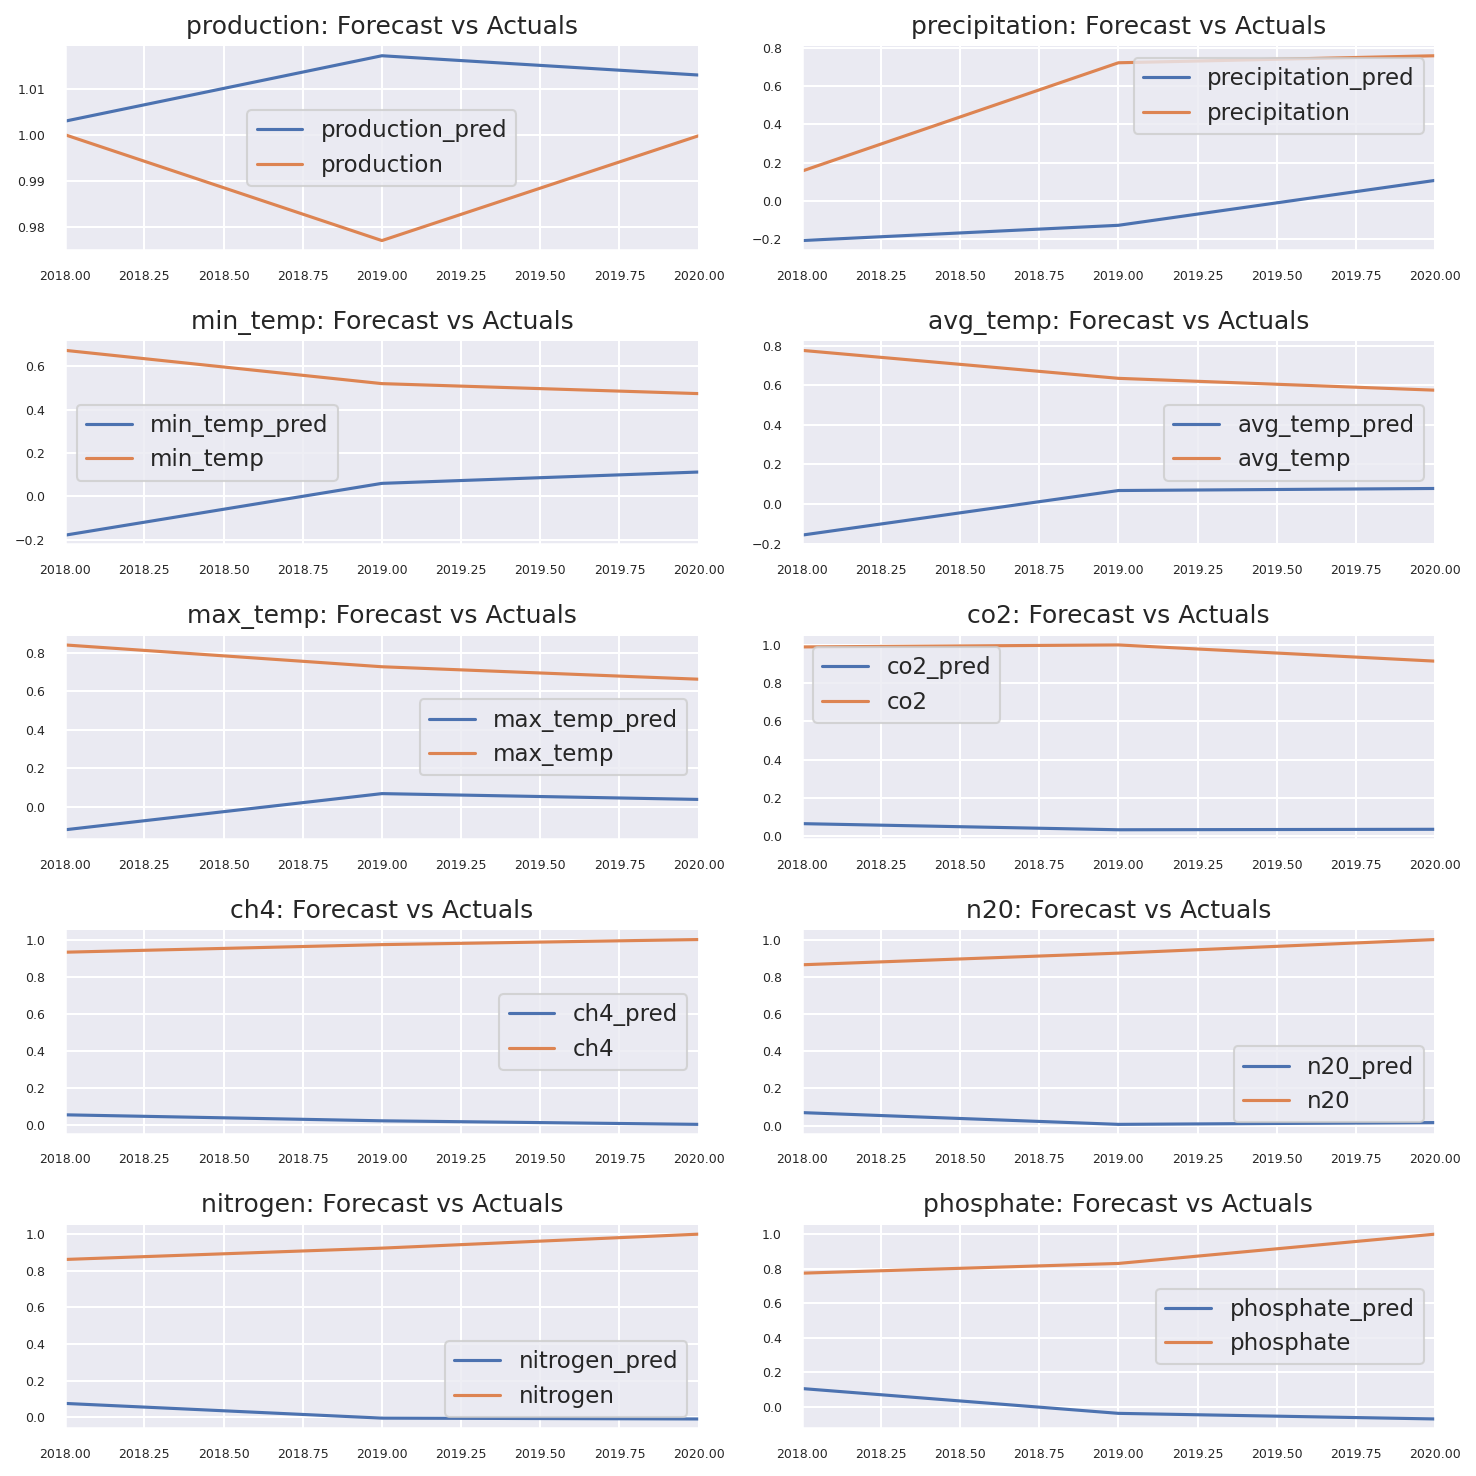

In [128]:
## https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

fig, axes = plt.subplots(nrows=int(len(Final.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(Final.columns, axes.flatten())):
    output[col+'_pred'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    X_test[col][-n_obs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();